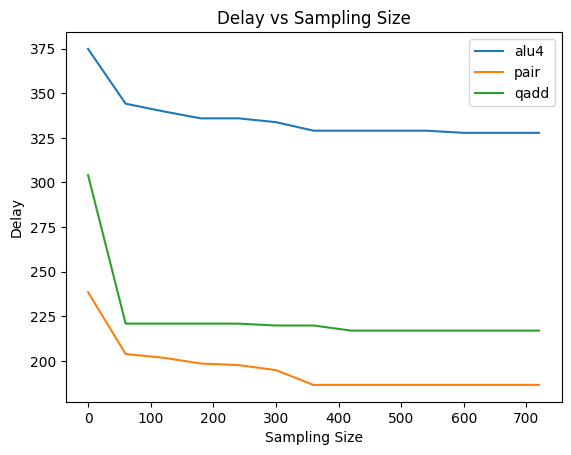

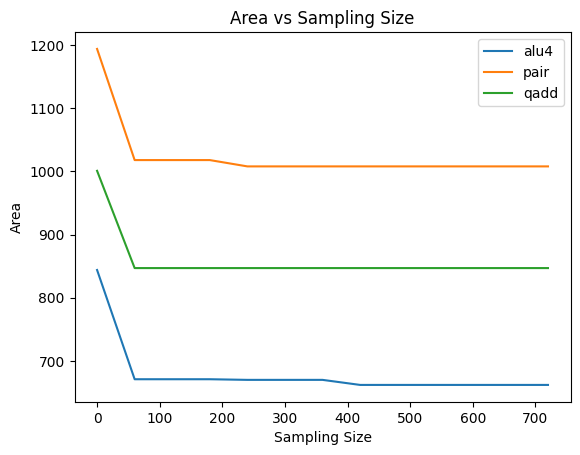

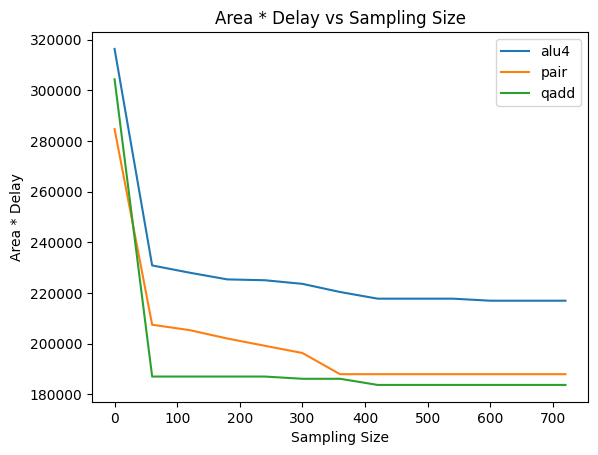

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./sampling_and_limit/summary_only_test.csv")
# normalize the 'delay` and `area` column
#df['delay'] = df['delay'] / df['delay'].max()
#df['area'] = df['area'] / df['area'].max()

# Delay graph
plt.figure()
for name, group in df.groupby('name'):
    plt.plot(group['time'], group['delay'], label=name)

plt.xlabel('Sampling Size')
plt.ylabel('Delay')
plt.legend()
plt.title('Delay vs Sampling Size')
# using log scale
#plt.yscale('log')

plt.savefig('delay_sampling.pdf')
plt.show()

# Area graph
plt.figure()
for name, group in df.groupby('name'):
    plt.plot(group['time'], group['area'], label=name)

plt.xlabel('Sampling Size')
plt.ylabel('Area')
plt.legend()
plt.title('Area vs Sampling Size')
# using log scale
#plt.yscale('log')

# save as pdf
plt.savefig('area_sampling.pdf')

plt.show()

# area * delay graph
plt.figure()
for name, group in df.groupby('name'):
    plt.plot(group['time'], group['area'] * group['delay'], label=name)


plt.xlabel('Sampling Size')
plt.ylabel('Area * Delay')
plt.legend()
plt.title('Area * Delay vs Sampling Size')
# using log scale
#plt.yscale('log')

plt.savefig('area_delay_sampling.pdf')
plt.show()

In [4]:
case_name = 'max'

In [50]:
import pandas as pd

# Read the two CSV files
df1 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_area_var.csv')
df2 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_delay_var.csv')

# Concatenate the two DataFrames vertically
df = pd.concat([df1, df2], ignore_index=True)

# Write the new DataFrame to a CSV file
df.to_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_var_abc_combined.csv', index=False)

# Read the two CSV files
df1 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_area_var1.csv')
df2 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_delay_var1.csv')
df3 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_area_var2.csv')
df4 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_delay_var2.csv')
df5 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_area_var3.csv')
df6 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_delay_var3.csv')

# Concatenate the two DataFrames vertically
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

# Write the new DataFrame to a CSV file
df.to_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_var_egraph_combined.csv', index=False)

The reference point is [1855.66, 2178.0].
The pareto points of ABC are [[1750.01, 2109.0], [1588.09, 2114.0], [1674.35, 2110.0], [1631.15, 2112.0], [1717.96, 2110.0], [1562.07, 2122.0]].
The pareto points of E-syn are [[1595.91, 2028.0], [1723.98, 2023.0], [1822.13, 2021.0], [1541.88, 2039.0], [1466.06, 2071.0]].
The hypervolume of ABC is 19498.89., and the hypervolume of E-syn is 55310.87.
The hypervolume of ABC/E-syn is 0.35.


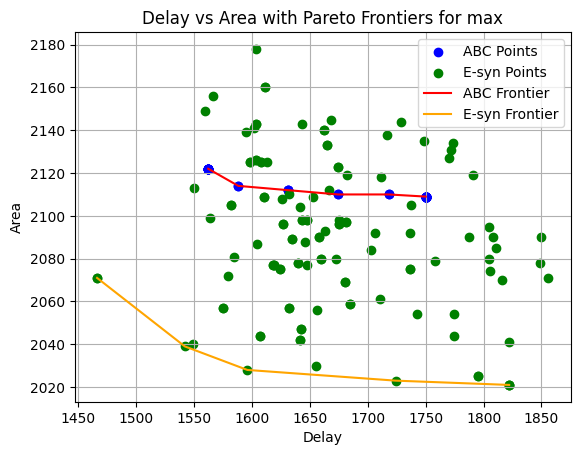

In [5]:
import matplotlib.pyplot as plt
import csv

# Parse CSV data
def parse_csv(filename):
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        data = {}
        index = 0
        for row in reader:
            op = row['WireLoad']
            area = float(row['Area'])
            delay = float(row['Delay'])
            # using index as key, e.g. data[0] = (area, delay, op)
            data[index] = (delay, area, op)
            index += 1
        return data
    
# Pareto frontier function
# def pareto_frontier_points(Xs, Ys):
#     pareto_points = []
#     for i in range(len(Xs)):
#         dominated = False
#         for j in range(len(Xs)):
#             if (Xs[j] <= Xs[i]) and (Ys[j] <= Ys[i]) and (i != j): # this condition setup is wrong!
#                 dominated = True
#                 break
#         if not dominated:
#             pareto_points.append((Xs[i], Ys[i]))
#     pareto_points.sort(key=lambda x: x[0])
#     return pareto_points

# Pareto frontier function
# def pareto_frontier_points(Xs, Ys):
#     ''' Pareto frontier selection process '''
#     points = [[Xs[i], Ys[i]] for i in range(len(Xs))]
#     pareto_front = []

#     for point in points:
#         dominated = False
#         for other_point in points:
#             if other_point[0] <= point[0] and other_point[1] <= point[1] and other_point != point:
#                 dominated = True
#                 break
#         if not dominated:
#             pareto_front.append(point)

#     ''' Sorting the Pareto frontier points '''
#     pareto_front.sort(key=lambda x: x[0])
#     return pareto_front

def calculate_hypervolume(pareto_points, ref_point):
    """
    Calculate the hypervolume given a set of Pareto points and a reference point.
    Assumes that lower values for both objectives are better.
    
    :param pareto_points: List of Pareto points [(x1, y1), (x2, y2), ...]
    :param ref_point: Reference point (x_ref, y_ref)
    :return: Hypervolume value
    """
    hypervolume = 0
    # remove the duplicate points, pareto_points is [x,y]
    pareto_points_remove_duplication = list(set(map(tuple, pareto_points)))
    for i in range(len(pareto_points_remove_duplication)):
        if i == 0:
            width = ref_point[0] - pareto_points_remove_duplication[i][0]
        else:
            width = pareto_points_remove_duplication[i-1][0] - pareto_points_remove_duplication[i][0]
        
        height = ref_point[1] - pareto_points_remove_duplication[i][1]
        hypervolume += width * height
    # keep hyper volume as a positive value
    hypervolume = abs(hypervolume)
    return hypervolume

def pareto_frontier_points(Xs, Ys, maxX=False, maxY=False):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    
    '''Sorting the Pareto frontier points'''
    pareto_front.sort(key=lambda x: x[0], reverse=maxX)
    return pareto_front

data2 = parse_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_var_egraph_combined.csv')
delays2 = [value[0] for value in data2.values()]
areas2 = [value[1] for value in data2.values()]
pareto2 = pareto_frontier_points(delays2, areas2)
pareto_x2 = [point[0] for point in pareto2]
pareto_y2 = [point[1] for point in pareto2]

data1 = parse_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/pareto/{case_name}/sorted_var_abc_combined.csv')
delays1 = [value[0] for value in data1.values()]
areas1 = [value[1] for value in data1.values()]
pareto1 = pareto_frontier_points(delays1, areas1)
pareto_x1 = [point[0] for point in pareto1]
pareto_y1 = [point[1] for point in pareto1]

# Calculate the hypervolume protortion
max_delay, max_area = max(delays1 + delays2), max(areas1 + areas2)
# ref_point = (max_delay, max_area)
# hypervolume_abc = calculate_hypervolume(pareto1, ref_point)
# hypervolume_e_syn = calculate_hypervolume(pareto2, ref_point)
# abc_e_syn_ratio = hypervolume_abc / hypervolume_e_syn
# print(f'The hypervolume of ABC/E-syn is {abc_e_syn_ratio:.2f}.')

# use library to calculate the hypervolume
from hv import HyperVolume
# referencePoint = [2, 2, 2]
# hyperVolume = HyperVolume(referencePoint)
# front = [[1, 0, 1], [0, 1, 0]]
# result = hyperVolume.compute(front)
referencePoint = [max_delay, max_area]
hyperVolume = HyperVolume(referencePoint)
print(f'The reference point is {referencePoint}.')
#print(f'The pareto points of ABC are {pareto1}.')
pareto1_remove_duplication = [list(sublist) for sublist in set(map(tuple, pareto1))]
pareto2_remove_duplication = [list(sublist) for sublist in set(map(tuple, pareto2))]
result1 = hyperVolume.compute(pareto1_remove_duplication)
result2 = hyperVolume.compute(pareto2_remove_duplication)
print(f'The pareto points of ABC are {pareto1_remove_duplication}.')
print(f'The pareto points of E-syn are {pareto2_remove_duplication}.')
print(f'The hypervolume of ABC is {result1:.2f}., and the hypervolume of E-syn is {result2:.2f}.')
abc_e_syn_ratio = result1 / result2
print(f'The hypervolume of ABC/E-syn is {abc_e_syn_ratio:.2f}.')

# Plotting
plt.scatter(delays1, areas1, color='blue', label='ABC Points')
plt.scatter(delays2, areas2, color='green', label='E-syn Points')
plt.plot(pareto_x1, pareto_y1, color='red', label='ABC Frontier')
plt.plot(pareto_x2, pareto_y2, color='orange', label='E-syn Frontier')
plt.xlabel('Delay')
plt.ylabel('Area')
plt.title(f'Delay vs Area with Pareto Frontiers for {case_name}')
plt.legend()
plt.grid(True)
# Save the plot as a PDF file
plt.savefig(f'/data/guangyuh/coding_env/E-Brush/res_visualization/{case_name}_pareto.pdf', bbox_inches='tight')

# Show the plot
plt.show()

[{'ABC': 272.0, 'ASTSize': 308.0, 'ASTDepth': 997.0, 'E-ASTSize': 250.0, 'E-ASTDepth': 1145.0}, {'ABC': 498.0, 'ASTSize': 496.0, 'ASTDepth': 498.0, 'E-ASTSize': 471.0, 'E-ASTDepth': 0.0}, {'ABC': 175.0, 'ASTSize': 150.0, 'ASTDepth': 997.0, 'E-ASTSize': 133.0, 'E-ASTDepth': 133.0}, {'ABC': 65.0, 'ASTSize': 63.0, 'ASTDepth': 997.0, 'E-ASTSize': 59.0, 'E-ASTDepth': 1145.0}, {'ABC': 1248.0, 'ASTSize': 1259.0, 'ASTDepth': 1259.0, 'E-ASTSize': 1180.0, 'E-ASTDepth': 0.0}, {'ABC': 1175.0, 'ASTSize': 1022.0, 'ASTDepth': 997.0, 'E-ASTSize': 1145.0, 'E-ASTDepth': 1145.0}, {'ABC': 837.0, 'ASTSize': 953.0, 'ASTDepth': 997.0, 'E-ASTSize': 834.0, 'E-ASTDepth': 834.0}, {'ABC': 1723.0, 'ASTSize': 1841.0, 'ASTDepth': 997.0, 'E-ASTSize': 1569.0, 'E-ASTDepth': 1569.0}, {'ABC': 1335.0, 'ASTSize': 1414.0, 'ASTDepth': 1265.0, 'E-ASTSize': 1161.0, 'E-ASTDepth': 0.0}, {'ABC': 478.0, 'ASTSize': 478.0, 'ASTDepth': 997.0, 'E-ASTSize': 357.0, 'E-ASTDepth': 357.0}, {'ABC': 2360.0, 'ASTSize': 2444.0, 'ASTDepth': 997

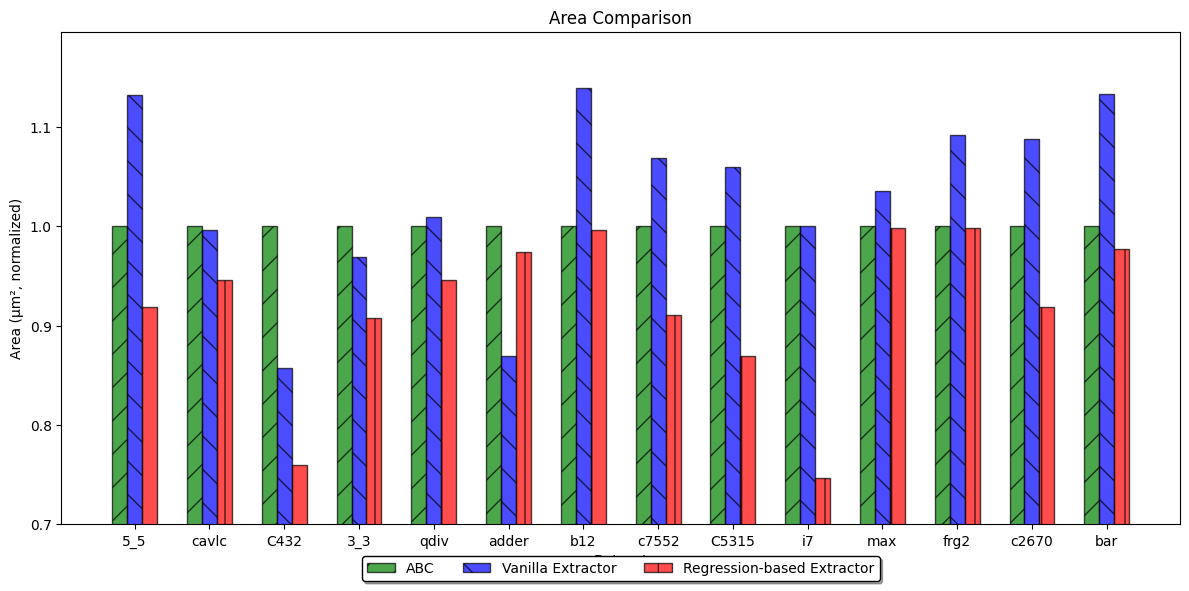

In [31]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to parse CSV data from a file
def parse_csv_data(file_path):
    with open(file_path, mode='r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        data = {}
        for row in csvreader:
            data[row['WireLoad']] = float(row['Area'])
        return data

# Function to get all CSV file paths in a directory
def get_csv_files(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]

# Directory containing the CSV files
directory_path = 'extractor_compare/'

# Get all CSV file paths
csv_files = get_csv_files(directory_path)

# Set up the figure and axis
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(12, 6))

# Set the figure and axes backgrounds to white
fig.patch.set_facecolor('white') # Uncomment and use this to set the background of the figure
ax.set_facecolor('white') # Uncomment and use this to set the background of the axes

# Disable grid and remove face color setting since you want it to be white
ax.grid(False)

# Keep the frame around the plot with black color
for spine in ax.spines.values():  # Set the color of the spines (the box around the plot)
    spine.set_visible(True)
    spine.set_color('black')

# Set the bar width
bar_width = 0.2

# Calculate the number of groups based on the number of CSV files
num_groups = len(csv_files)

# Set positions for the groups
group_positions = np.arange(num_groups)

# Set positions for the bars within each group
bar_positions = np.array([group_positions + i * bar_width for i in range(-1, 2)])

# Initialize lists for the x-axis labels
xticklabels = []

# Define some hatch patterns to distinguish the bars further
hatch_patterns = ['/', '\\', '|']

# use a list to store the data_parsed
data_parsed_list = []

# Read and plot the data for each CSV file
for file_index, file_path in enumerate(csv_files):
    data_parsed = parse_csv_data(file_path); data_parsed_list.append(data_parsed)
    xticklabels.append(os.path.splitext(os.path.basename(file_path))[0])

    # Iterate over each label and plot the bars using the `if else` condition
    for idx, (label, color) in enumerate(zip(['ABC', 'ASTSize', 'E-ASTSize'], ['green', 'blue', 'red'])):
        if label in data_parsed:
            bar_value = data_parsed[label]/data_parsed['ABC']
            if label == 'ASTSize':
                ax.bar(bar_positions[idx][file_index], bar_value, width=bar_width, label='Vanilla Extractor' if file_index == 0 else '', color=color, alpha=0.7, edgecolor='black', hatch=hatch_patterns[idx])
            elif label == 'ABC':
                ax.bar(bar_positions[idx][file_index], bar_value, width=bar_width, label='ABC' if file_index == 0 else '', color=color, alpha=0.7, edgecolor='black', hatch=hatch_patterns[idx])
            elif label == 'E-ASTSize':
                ax.bar(bar_positions[idx][file_index], bar_value, width=bar_width, label='Regression-based Extractor' if file_index == 0 else '', color=color, alpha=0.7, edgecolor='black', hatch=hatch_patterns[idx])

print(data_parsed_list)

# calculate the average of the data_parsed_list
abc_area_sum = sum([data_parsed['ABC'] for data_parsed in data_parsed_list])
vanilla_extractor_area_sum = sum([data_parsed['ASTSize'] for data_parsed in data_parsed_list])
esyn_extractor_area_sum = sum([data_parsed['E-ASTSize'] for data_parsed in data_parsed_list])
# the ABC
#print(f'The ABC area list is {[data_parsed["ABC"] for data_parsed in data_parsed_list]}.')
print(f'The average area of ABC is {abc_area_sum/len(data_parsed_list):.2f}.')
# the vanilla extractor
#print(f'The vanilla extractor area list is {[data_parsed["ASTSize"] for data_parsed in data_parsed_list]}.')
print(f'The average area of vanilla extractor is {vanilla_extractor_area_sum/len(data_parsed_list):.2f}.')
# the E-syn extractor
#print(f'The E-syn extractor area list is {[data_parsed["E-ASTSize"] for data_parsed in data_parsed_list]}.')
print(f'The average area of E-syn extractor is {esyn_extractor_area_sum/len(data_parsed_list):.2f}.')

# Compared to the vanilla extractor, the e-syn extraction method achieves up to 
# record the max gap between the vanilla extractor and the e-syn extractor, and using 1 - the ratio to represent the gap
print(f'The max gap between the vanilla extractor and the e-syn extractor is { 1- min([data_parsed["E-ASTSize"]/data_parsed["ASTSize"] for data_parsed in data_parsed_list]):.2f}.')
print(f'The max gap between the ABC and the e-syn extractor is { 1- min([data_parsed["E-ASTSize"]/data_parsed["ABC"] for data_parsed in data_parsed_list]):.2f}.')
print(f'The average improvement of the e-syn extractor over the vanilla extractor is { 1- esyn_extractor_area_sum/vanilla_extractor_area_sum:.2f}.')
print(f'The average improvement of the e-syn extractor over the ABC is { 1- esyn_extractor_area_sum/abc_area_sum:.2f}.')

# Set the x-axis labels, title, and x-axis ticks
ax.set_xlabel('Dataset')
ax.set_xticks(group_positions)
ax.set_xticklabels(xticklabels)
ax.set_ylabel('Area (µm², normalized)')
ax.set_title('Area Comparison')
#ax.set_yscale('log')
# Add a legend
#ax.legend(title="Extractor", loc='upper left')
#ax.legend(title="Extractor")

# y axis range from 0.5
ax.set_ylim(0.7,)

# Add a legend with a white background and black edge
legend = ax.legend(title="", frameon=True, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
#legend.set_loc("upper center")

# Tight layout for better spacing
plt.tight_layout()

# Save the figure to a PDF
plt.savefig('bar_chart_comparison_area.pdf')

# Show the plot
plt.show()


The average delay of ABC is 565.88.
The average delay of vanilla extractor is 592.02.
The average delay of E-syn extractor is 466.50.
The max gap between the vanilla extractor and the e-syn extractor is 0.34.
The max gap between the ABC and the e-syn extractor is 0.60.
The average improvement of the e-syn extractor over the vanilla extractor is 0.21.
The average improvement of the e-syn extractor over the ABC is 0.18.


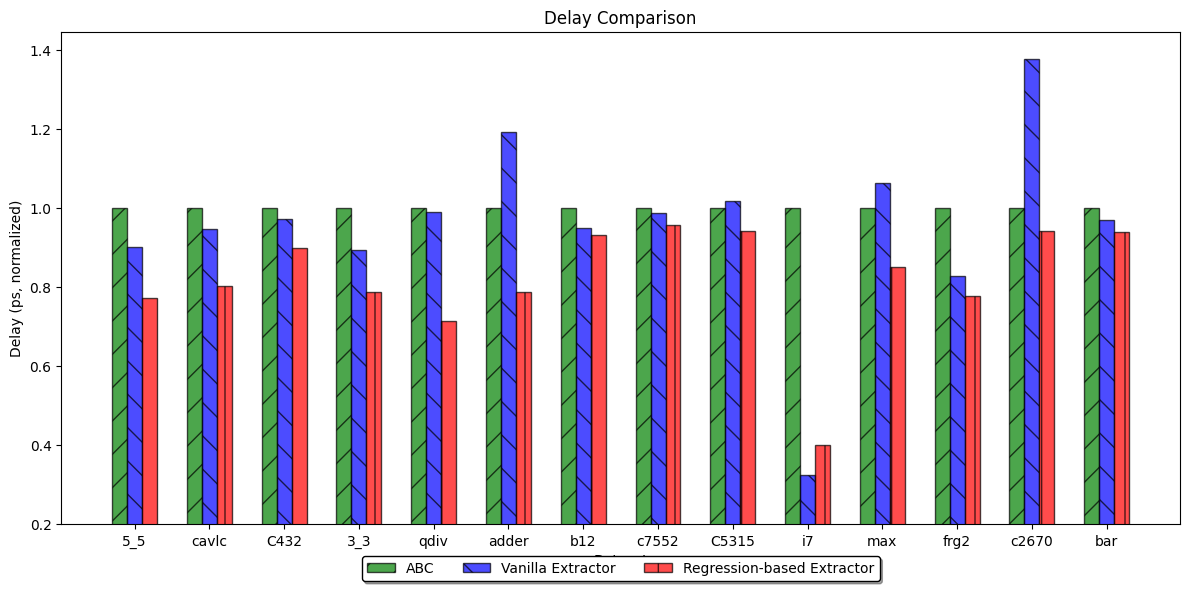

In [32]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to parse CSV data from a file
def parse_csv_data(file_path):
    with open(file_path, mode='r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        data = {}
        for row in csvreader:
            data[row['WireLoad']] = float(row['Delay'])
        return data

# Function to get all CSV file paths in a directory
def get_csv_files(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]

# Directory containing the CSV files
directory_path = 'extractor_compare/'

# Get all CSV file paths
csv_files = get_csv_files(directory_path)

# Set up the figure and axis
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(12, 6))

# Set the figure and axes backgrounds to white
fig.patch.set_facecolor('white') # Uncomment and use this to set the background of the figure
ax.set_facecolor('white') # Uncomment and use this to set the background of the axes

# Disable grid and remove face color setting since you want it to be white
ax.grid(False)

# Keep the frame around the plot with black color
for spine in ax.spines.values():  # Set the color of the spines (the box around the plot)
    spine.set_visible(True)
    spine.set_color('black')

# Set the bar width
bar_width = 0.2

# Calculate the number of groups based on the number of CSV files
num_groups = len(csv_files)

# Set positions for the groups
group_positions = np.arange(num_groups)

# Set positions for the bars within each group
bar_positions = np.array([group_positions + i * bar_width for i in range(-1, 2)])

# Initialize lists for the x-axis labels
xticklabels = []

# Define some hatch patterns to distinguish the bars further
hatch_patterns = ['/', '\\', '|']

data_parsed_list = []

# Read and plot the data for each CSV file
for file_index, file_path in enumerate(csv_files):
    data_parsed = parse_csv_data(file_path)
    xticklabels.append(os.path.splitext(os.path.basename(file_path))[0])

    # Iterate over each label and plot the bars using the `if else` condition
    for idx, (label, color) in enumerate(zip(['ABC', 'ASTDepth', 'E-ASTDepth'], ['green', 'blue', 'red'])):
        if label in data_parsed:
            bar_value = data_parsed[label]/data_parsed['ABC']; data_parsed_list.append(data_parsed)
            if label == 'ASTDepth':
                ax.bar(bar_positions[idx][file_index], bar_value, width=bar_width, label='Vanilla Extractor' if file_index == 0 else '', color=color, alpha=0.7, edgecolor='black', hatch=hatch_patterns[idx])
            elif label == 'ABC':
                ax.bar(bar_positions[idx][file_index], bar_value, width=bar_width, label='ABC' if file_index == 0 else '', color=color, alpha=0.7, edgecolor='black', hatch=hatch_patterns[idx])
            elif label == 'E-ASTDepth':
                ax.bar(bar_positions[idx][file_index], bar_value, width=bar_width, label='Regression-based Extractor' if file_index == 0 else '', color=color, alpha=0.7, edgecolor='black', hatch=hatch_patterns[idx])

# sort the ax.bar by the bar_value


# calculate the average of the data_parsed_list
abc_delay_sum = sum([data_parsed['ABC'] for data_parsed in data_parsed_list])
vanilla_extractor_delay_sum = sum([data_parsed['ASTDepth'] for data_parsed in data_parsed_list])
esyn_extractor_delay_sum = sum([data_parsed['E-ASTDepth'] for data_parsed in data_parsed_list])
# the ABC
#print(f'The ABC delay list is {[data_parsed["ABC"] for data_parsed in data_parsed_list]}.')
print(f'The average delay of ABC is {abc_delay_sum/len(data_parsed_list):.2f}.')
# the vanilla extractor
#print(f'The vanilla extractor delay list is {[data_parsed["ASTDepth"] for data_parsed in data_parsed_list]}.')
print(f'The average delay of vanilla extractor is {vanilla_extractor_delay_sum/len(data_parsed_list):.2f}.')
# the E-syn extractor
#print(f'The E-syn extractor delay list is {[data_parsed["E-ASTDepth"] for data_parsed in data_parsed_list]}.')
print(f'The average delay of E-syn extractor is {esyn_extractor_delay_sum/len(data_parsed_list):.2f}.')

# Compared to the vanilla extractor, the e-syn extraction method achieves up to 
# record the max gap between the vanilla extractor and the e-syn extractor, and using 1 - the ratio to represent the gap
print(f'The max gap between the vanilla extractor and the e-syn extractor is { 1- min([data_parsed["E-ASTDepth"]/data_parsed["ASTDepth"] for data_parsed in data_parsed_list]):.2f}.')
print(f'The max gap between the ABC and the e-syn extractor is { 1- min([data_parsed["E-ASTDepth"]/data_parsed["ABC"] for data_parsed in data_parsed_list]):.2f}.')
print(f'The average improvement of the e-syn extractor over the vanilla extractor is { 1- esyn_extractor_delay_sum/vanilla_extractor_delay_sum:.2f}.')
print(f'The average improvement of the e-syn extractor over the ABC is { 1- esyn_extractor_delay_sum/abc_delay_sum:.2f}.')

# Set the x-axis labels, title, and x-axis ticks
ax.set_xlabel('Dataset')
ax.set_xticks(group_positions)
ax.set_xticklabels(xticklabels)
ax.set_ylabel('Delay (ps, normalized)')
ax.set_title('Delay Comparison')

# Add a legend
#ax.legend(title="Extractor", loc='upper left')
ax.legend(title="Extractor")
#ax.set_yscale('log')

# y axis range from 0.5
ax.set_ylim(0.2,)

# Add a legend with a white background and black edge
legend = ax.legend(title="", frameon=True, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')

# Tight layout for better spacing
plt.tight_layout()

# Save the figure to a PDF
plt.savefig('bar_chart_comparison_delay.pdf')

# Show the plot
plt.show()


In [ ]:
# test hv calculation
from hv import HyperVolume
referencePoint = [322.99, 563.0]
hyperVolume = HyperVolume(referencePoint)
front = [[191.99, 520.0], [255.96, 468.0], [264.48, 462.0], [195.97, 491.0], [234.65, 484.0], [193.98, 494.0], [200.95, 488.0], [249.09, 476.0], [239.7, 482.0], [239.62, 483.0], [260.9, 468.0]]
result = hyperVolume.compute(front)
print(result)